In [1]:
# Stdlib
import pickle
from IPython.display import display, Latex
from ast import literal_eval as literal

# Scientific computing
import numpy as np

# Data handling and vis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Miscellaneous
from tabulate import tabulate

# Preprocessing

## Loading and concatenating dataframes

In [2]:
# Small datasets
metadata = {
    "PROJECT_ID": "EMB_ex29",
    "RESEARCHERS": "DK",
    "CURRENT_VERSION": "v4.0",
    "DATE": "20230404"
}
TAG = "{PROJECT_ID}{CURRENT_VERSION}_{RESEARCHERS}_{DATE}".format(**metadata)

df = pd.read_csv(f"../../results/dataframes/dataframe_{TAG}.csv")

In [3]:
df

,Unnamed: 0,system,l1,l2,features,theta,intercept,coefficients,accuracy,auroc,aupr,log_penalty
0,0,london,1,2,{'imb'},0.05,1.871802,[0.],0.804469,0.5,0.902235,-12.0
1,1,london,1,2,{'imb'},0.05,2.564948,[0.],0.802228,0.5,0.901114,-12.0
2,2,london,1,2,{'imb'},0.05,1.871802,[0.],0.804469,0.5,0.902235,-12.0
3,3,london,1,2,{'imb'},0.05,1.098611,[0.],0.809524,0.5,0.904762,-12.0
4,4,london,1,2,{'imb'},0.05,0.510835,[0.],0.815126,0.5,0.907563,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4835,4835,celegans,1,2,"{'imb', 'emb_r', 'deg'}",0.95,0.000000,[0. 0.],0.640625,0.5,0.679688,-12.0
4836,4836,celegans,1,2,"{'imb', 'emb_r', 'deg'}",0.95,0.000000,[0. 0.],0.656716,0.5,0.671642,-12.0
4837,4837,celegans,1,2,"{'imb', 'emb_r', 'deg'}",0.95,0.000000,[0. 0.],0.711864,0.5,0.644068,-12.0
4838,4838,celegans,1,2,"{'imb', 'emb_r', 'deg'}",0.95,0.000000,[0. 0.],0.691176,0.5,0.654412,-12.0


## Pruning

In [4]:
# Drop dummy index
df = df.drop(columns=["Unnamed: 0"])

# Drop rows with missing data
df.dropna(how="any", inplace=True)

## Reindexing and renaming

In [5]:
# Rename layers
df = df.rename(columns={"l1": "alpha", "l2": "beta"})

In [6]:
df.describe()

,alpha,beta,theta,intercept,accuracy,auroc,aupr,log_penalty
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.0
mean,1.250569,3.002278,0.498975,-0.077356,0.661542,0.657640,0.804512,-12.0
std,0.433386,1.733543,0.284146,1.505086,0.279551,0.224261,0.211838,0.0
min,1.000000,2.000000,0.050000,-10.065044,0.058113,0.083074,0.221670,-12.0
25%,1.000000,2.000000,0.230000,0.000000,0.531114,0.500000,0.664282,-12.0
50%,1.000000,2.000000,0.500000,0.000000,0.696751,0.587712,0.896514,-12.0
75%,2.000000,6.000000,0.770000,0.040194,0.925926,0.912509,0.983177,-12.0
max,2.000000,6.000000,0.950000,3.046935,1.000000,1.000000,1.000000,-12.0


# Analysis

## Performance

### By feature

#### One feature

<Figure size 432x288 with 0 Axes>

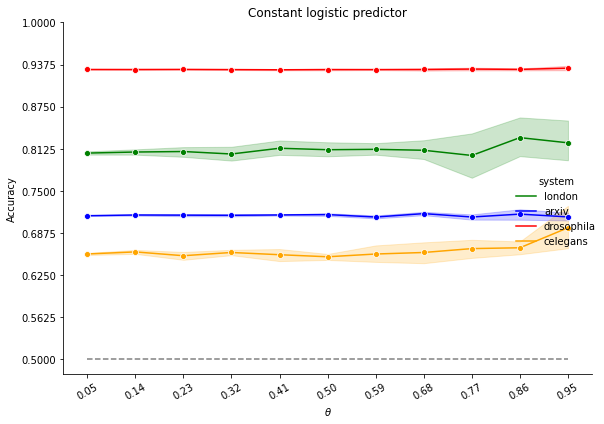

In [7]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'imb'}"], kind="line",
    x="theta", y="accuracy",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("Accuracy")


# Figure-level attributes
plt.title("Constant logistic predictor")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb_{TAG}.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

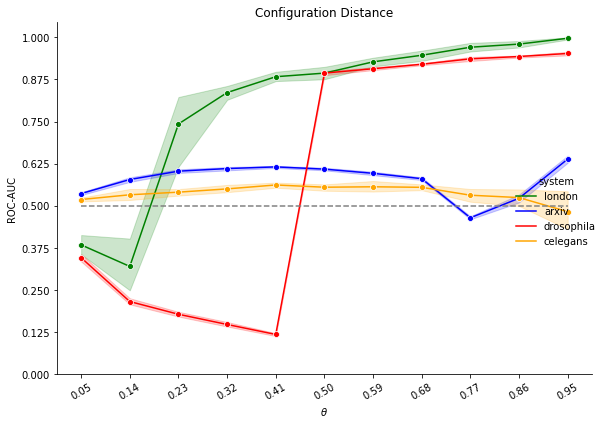

<Figure size 432x288 with 0 Axes>

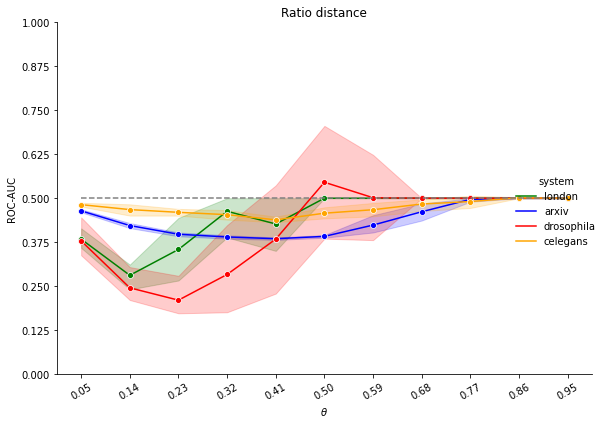

In [8]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'emb_c'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration Distance")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_emb-c_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'emb_r'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_emb-r_{TAG}.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

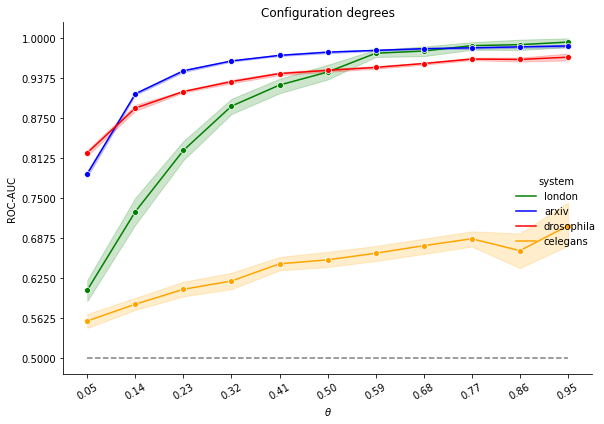

In [9]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[df.features == "{'deg'}"], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration degrees")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_deg_{TAG}.png", facecolor="white", transparent=False)

#### Two features

<Figure size 432x288 with 0 Axes>

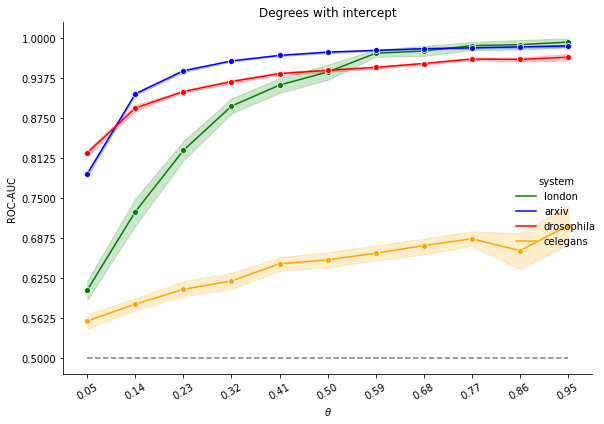

In [10]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'imb', 'deg'}") | (df.features == "{'deg', 'imb'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Degrees with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-deg_{TAG}.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

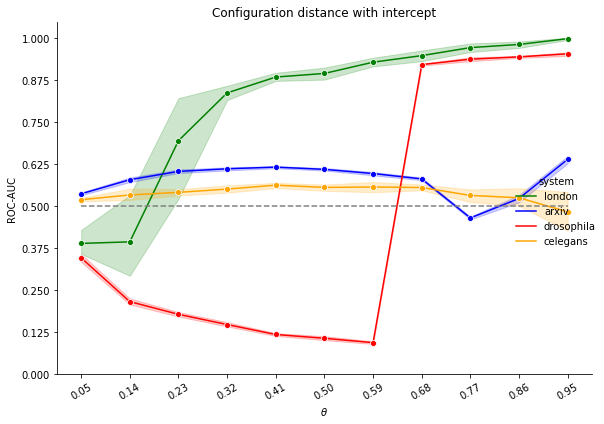

<Figure size 432x288 with 0 Axes>

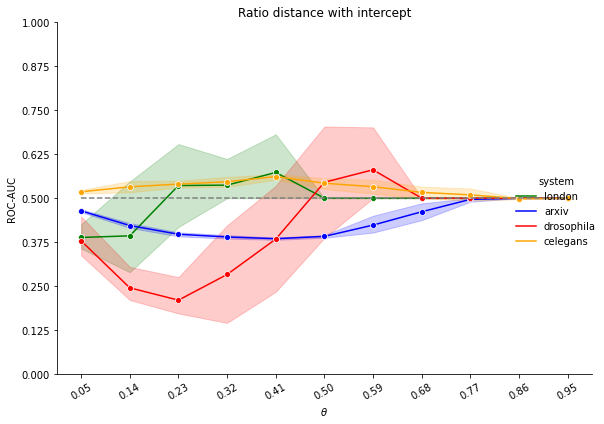

In [11]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb_c', 'imb'}") | (df.features == "{'imb', 'emb_c'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-c_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb_r', 'imb'}") | (df.features == "{'imb', 'emb_r'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance with intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r_{TAG}.png", facecolor="white", transparent=False)

<Figure size 432x288 with 0 Axes>

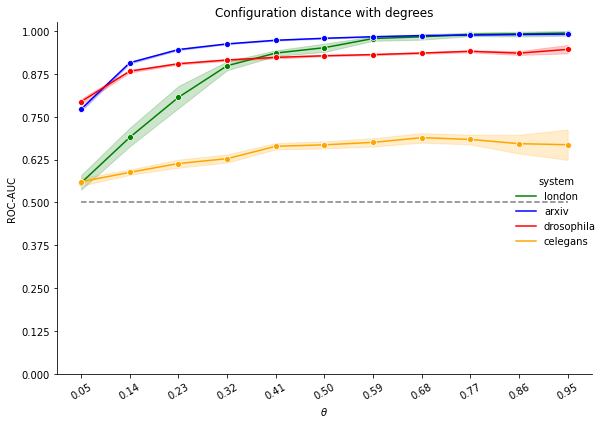

<Figure size 432x288 with 0 Axes>

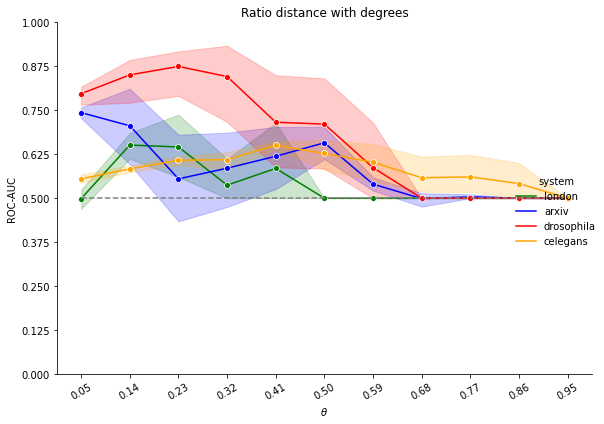

In [12]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb_c', 'deg'}") | (df.features == "{'deg', 'emb_c'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance with degrees")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_emb-c-deg_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb_r', 'deg'}") | (df.features == "{'deg', 'emb_r'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance with degrees")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

#### All features

<Figure size 432x288 with 0 Axes>

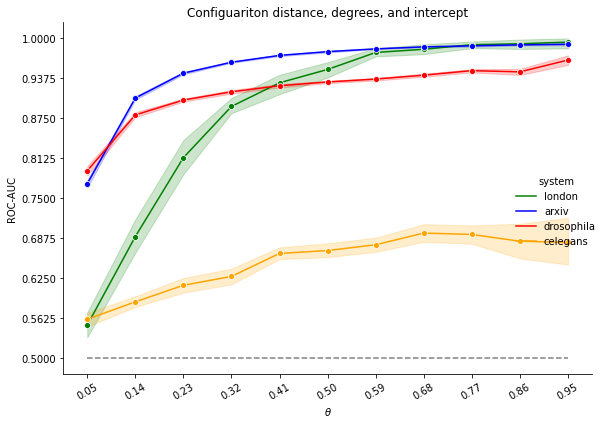

<Figure size 432x288 with 0 Axes>

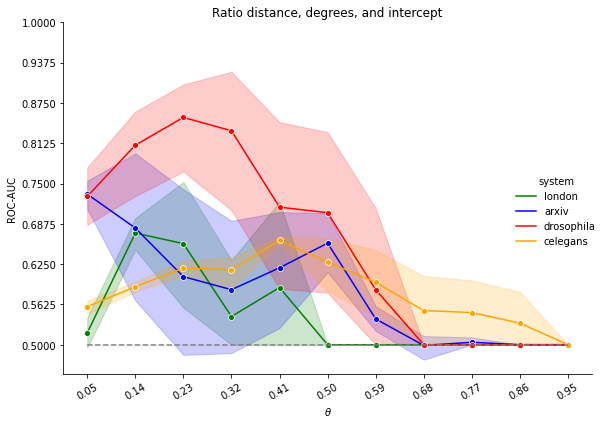

In [13]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb_c', 'deg', 'imb'}") | (df.features == "{'imb', 'emb_c', 'deg'}") | (df.features == "{'imb', 'deg', 'emb_c'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuariton distance, degrees, and intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-c-deg_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df.loc[(df.features == "{'emb_r', 'deg', 'imb'}") | (df.features == "{'imb', 'emb_r', 'deg'}") | (df.features == "{'imb', 'deg', 'emb_r'}")], kind="line",
    x="theta", y="auroc",
    hue="system", palette=["green", "blue", "red", "orange"],
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance, degrees, and intercept")

# Save plot
plt.tight_layout()
plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

### By system

#### arxiv

In [14]:
system = "arxiv"
df_ = df.query("system == @system")
df_ = df_.drop(columns=["system", "alpha", "beta", "log_penalty"])
df_ = df_.loc[
    (df_.features == "{'deg', 'imb'}") | \
        (df_.features == "{'imb', 'emb_c'}") | (df_.features == "{'emb_r', 'imb'}") | \
        (df_.features == "{'imb', 'deg', 'emb_c'}") | (df_.features == "{'imb', 'emb_r', 'deg'}")
]

<Figure size 432x288 with 0 Axes>

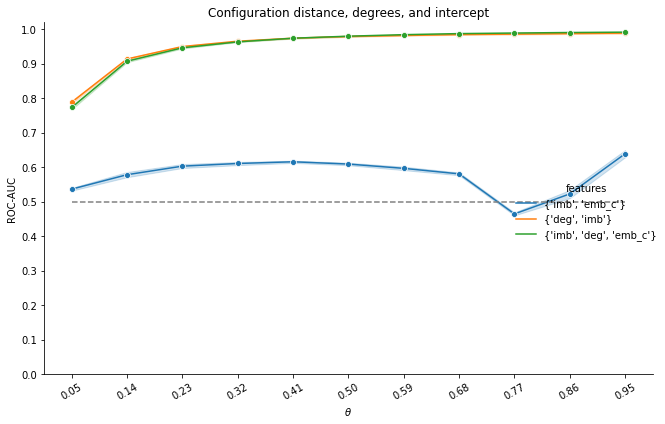

<Figure size 432x288 with 0 Axes>

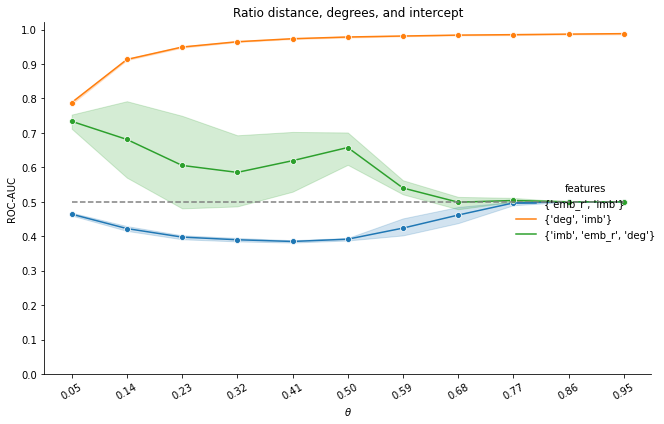

In [15]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_r")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_c")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

#### celegans

In [16]:
system = "celegans"
df_ = df.query("system == @system")
df_ = df_.drop(columns=["system", "alpha", "beta", "log_penalty"])
df_ = df_.loc[
    (df_.features == "{'deg', 'imb'}") | \
        (df_.features == "{'imb', 'emb_c'}") | (df_.features == "{'emb_r', 'imb'}") | \
        (df_.features == "{'imb', 'deg', 'emb_c'}") | (df_.features == "{'imb', 'emb_r', 'deg'}")
]

<Figure size 432x288 with 0 Axes>

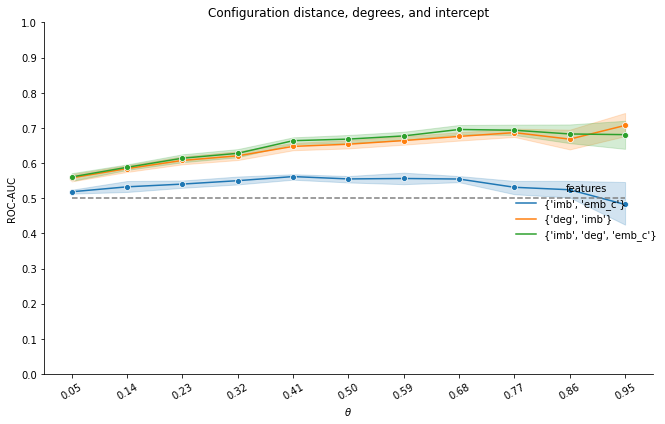

<Figure size 432x288 with 0 Axes>

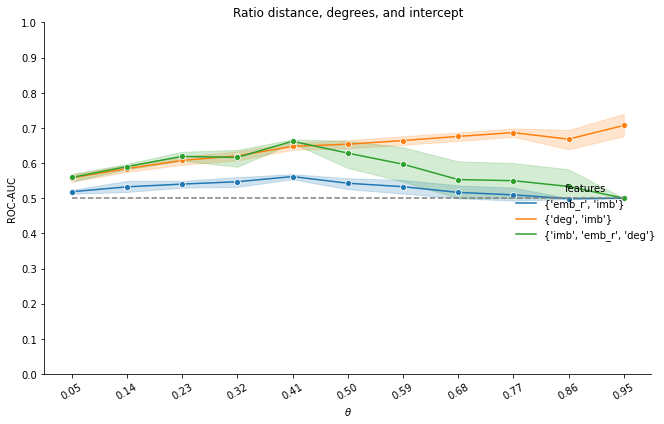

In [17]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_r")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_c")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

#### drosopila

In [18]:
system = "drosophila"
df_ = df.query("system == @system")
df_ = df_.drop(columns=["system", "alpha", "beta", "log_penalty"])
df_ = df_.loc[
    (df_.features == "{'deg', 'imb'}") | \
        (df_.features == "{'imb', 'emb_c'}") | (df_.features == "{'emb_r', 'imb'}") | \
        (df_.features == "{'imb', 'deg', 'emb_c'}") | (df_.features == "{'imb', 'emb_r', 'deg'}")
]

<Figure size 432x288 with 0 Axes>

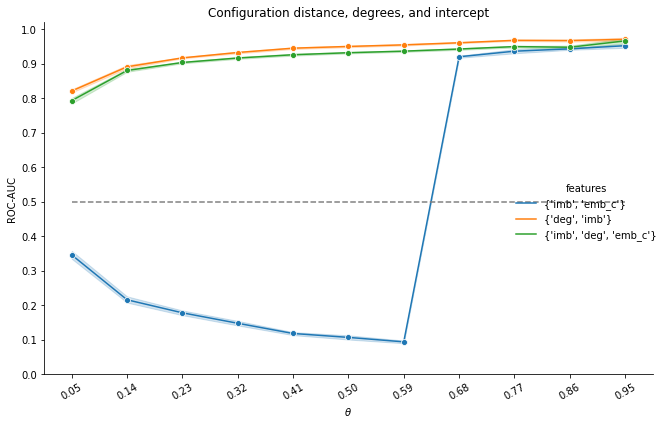

<Figure size 432x288 with 0 Axes>

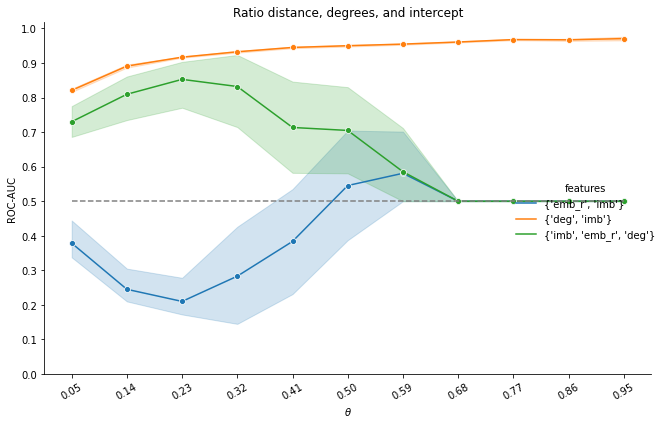

In [19]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_r")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_c")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

#### london

In [20]:
system = "london"
df_ = df.query("system == @system")
df_ = df_.drop(columns=["system", "alpha", "beta", "log_penalty"])
df_ = df_.loc[
    (df_.features == "{'deg', 'imb'}") | \
        (df_.features == "{'imb', 'emb_c'}") | (df_.features == "{'emb_r', 'imb'}") | \
        (df_.features == "{'imb', 'deg', 'emb_c'}") | (df_.features == "{'imb', 'emb_r', 'deg'}")
]

<Figure size 432x288 with 0 Axes>

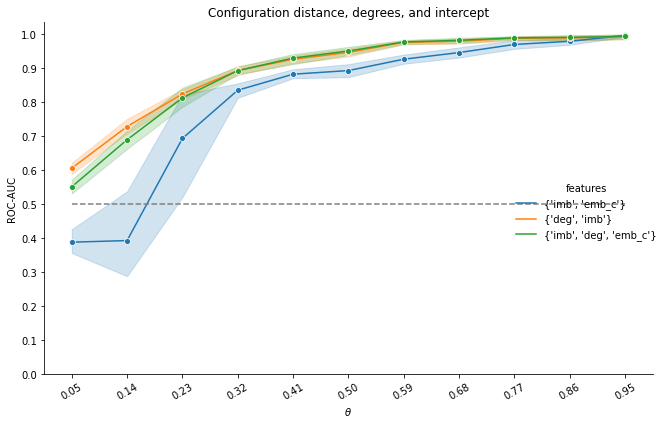

<Figure size 432x288 with 0 Axes>

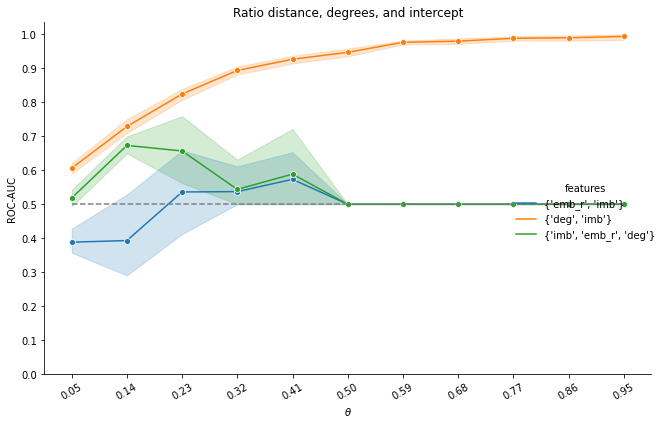

In [21]:
# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_r")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Configuration distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

# ==============================================================================

# Instantiate figure, subset relevant data
plt.figure()

# Plotting data
sns.relplot(
    data=df_.loc[~df_.features.str.contains("emb_c")], kind="line",
    x="theta", y="auroc",
    hue="features",
    marker="o",
    height=6, aspect=1.2,
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")
plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")


plt.yticks(np.linspace(0.0, 1, endpoint=True, num=10+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.title("Ratio distance, degrees, and intercept")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_auroc-pfi_imb-emb-r-deg_{TAG}.png", facecolor="white", transparent=False)

## [DEPRECIATED] Comparison with other feature form

### arxiv

In [22]:
df_d = pd.read_csv(f"../../results/dataframes/ex29_arxiv_d.csv")

In [23]:
# df_ = df.loc[(df.features == "{'emb', 'deg', 'imb'}") | (df.features == "{'imb', 'emb', 'deg'}") | (df.features == "{'imb', 'deg', 'emb'}")]
df_ = df.loc[(df.features == "{'emb', 'imb'}") | (df.features == "{'imb', 'emb'}")]
df_ = df_.loc[df_.system == "arxiv"][::10]
x_ = df_["theta"]
y_ = df_["auroc"]

In [24]:
df__ = df_d.loc[(df_d.features == "{'emb', 'imb'}") | (df_d.features == "{'imb', 'emb'}")][::10]
x__ = df__["theta"]
y__ = df__["auroc"]

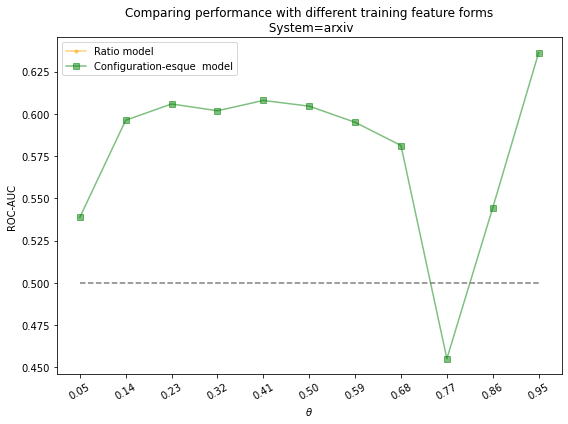

In [25]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,6))

# Plotting data
plt.plot(
    x_, y_,
    marker=".",
    color="orange",
    alpha=0.5,
    label="Ratio model"
)
plt.plot(
    x__, y__,
    marker="s",
    color="green",
    alpha=0.5,
    label="Configuration-esque  model"
)

# Axes configuration
plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")

plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")

# plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.legend()
plt.title("Comparing performance with different training feature forms\n System=arxiv")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_aupr-pfi_imb-emb-deg_{TAG}.png", facecolor="white", transparent=False)

### Drosophila

In [26]:
df_d = pd.read_csv(f"../../results/dataframes/ex29_drosophila_d.csv")

In [27]:
# df_ = df.loc[(df.features == "{'imb', 'emb', 'deg'}") & (df.system == "drosophila")][::10]
df_ = df.loc[(df.features == "{'imb', 'emb'}") & (df.system == "drosophila")][::10]
x_ = df_["theta"]
y_ = df_["auroc"]

In [28]:
# df__ = df_d.loc[df_d.features == "{'imb', 'emb', 'deg'}"][::10]
df__ = df_d.loc[df_d.features == "{'imb', 'emb'}"][::10]
x__ = df__["theta"]
y__ = df__["auroc"]

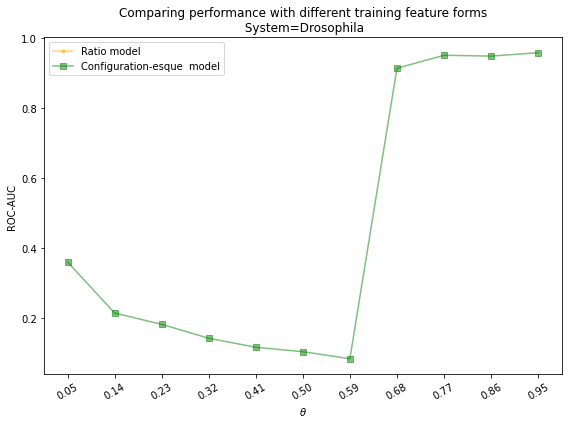

In [29]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,6))

# Plotting data
plt.plot(
    x_, y_,
    marker=".",
    color="orange",
    alpha=0.5,
    label="Ratio model"
)
plt.plot(
    x__, y__,
    marker="s",
    color="green",
    alpha=0.5,
    label="Configuration-esque  model"
)

# Axes configuration
# plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")

plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")

# plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.legend()
plt.title("Comparing performance with different training feature forms\n System=Drosophila")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_aupr-pfi_imb-emb-deg_{TAG}.png", facecolor="white", transparent=False)

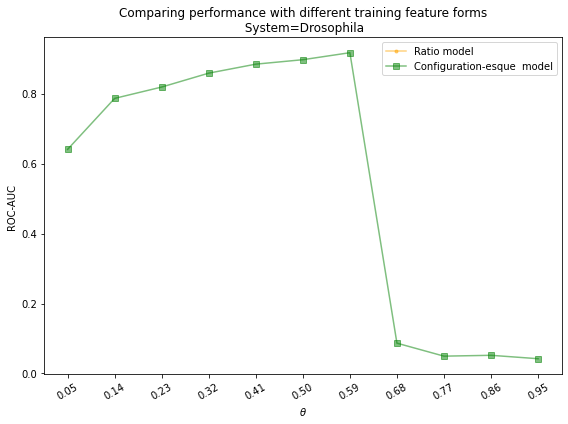

In [30]:
# Instantiate figure, subset relevant data
plt.figure(figsize=(8,6))

# Plotting data
plt.plot(
    x_, y_,
    marker=".",
    color="orange",
    alpha=0.5,
    label="Ratio model"
)
plt.plot(
    x__, [1-y for y in y__],
    marker="s",
    color="green",
    alpha=0.5,
    label="Configuration-esque  model"
)

# Axes configuration
# plt.hlines(0.5, 0.05, 0.95, linestyles="dashed", colors="gray")

plt.xticks(
    [float(np.format_float_scientific(x, precision=1)) for x in set(df["theta"])],
    rotation=30
)
plt.xlabel("$\\theta$")

# plt.yticks(np.linspace(0.5, 1, endpoint=True, num=8+1))
plt.ylabel("ROC-AUC")


# Figure-level attributes
plt.legend()
plt.title("Comparing performance with different training feature forms\n System=Drosophila")

# Save plot
plt.tight_layout()
# plt.savefig(f"../../results/plots/line_aupr-pfi_imb-emb-deg_{TAG}.png", facecolor="white", transparent=False)